# Feature Extraction using Pretrained Network VGG16
## Introduction:
## VGG is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”  . The model achieves 92.7% top-5 test accuracy in ImageNet  , which is a dataset of over 14 million images belonging to 1000 classes.

In [1]:
import numpy as np
from keras.datasets import mnist

/home/liang/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train[:20])

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


## Modified the input date to satified the VGG requirement

In [4]:
nsize = 48
X_train0 = x_train / 255.
X_test0 = x_test / 255.
X_train = np.zeros((x_train.shape[0], nsize, nsize, 3))
X_test = np.zeros((x_test.shape[0], nsize, nsize, 3))


X_train[:,:x_train.shape[1],:x_train.shape[2],0] = X_train0
X_test[:,:x_test.shape[1],:x_test.shape[2],0] = X_test0

In [5]:
Y_train = np.zeros((y_train.shape[0], 10))
Y_test = np.zeros((y_test.shape[0], 10))
for i in range(y_train.shape[0]):
    Y_train[i, y_train[i]] = 1
for j in range(y_test.shape[0]):
    Y_test[j, y_test[j]] = 1 

In [6]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_train[0])
print(y_train[0])
print(Y_test[0])
print(y_test[0])

(60000, 48, 48, 3)
(10000, 48, 48, 3)
(60000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7


In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.applications.vgg16 import VGG16

In [9]:
image_size = nsize
model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

## VGG16 Architecture

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

In [10]:
import time
ts = time.time()
img = X_train
featuresTr = model.predict(img)
print(time.time() - ts)

1541.06984401


In [14]:
ts2 = time.time()
img = X_test
featuresTe = model.predict(img)
print(time.time() - ts2)

245.298887968


## Use PCA to visualize extracted features

In [15]:
# PCA
import numpy as np
from matplotlib import pyplot as plt
from scipy import io as spio
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [17]:
featuresN = featuresTe.reshape(featuresTe.shape[0], featuresTe.shape[3])
print(featuresN.shape)
print(np.max(featuresN), np.min(featuresN))
scaler = StandardScaler()
scaler.fit(featuresN)
trainX = scaler.transform(featuresN) 
print(trainX[0,:10])

(10000, 512)
9.969863 0.0
[-0.3980431   0.         -0.70989907 -0.05489297 -0.6735974   0.
  1.1654061  -0.13463567  0.         -0.8198328 ]


In [18]:
k = 3
kmodel = PCA(n_components = k).fit(trainX)
pca_result = kmodel.transform(trainX)
pca_one = pca_result[:,0]
pca_two = pca_result[:,1]
pca_three = pca_result[:,2]
print ('Explained variation per principal component: {}'.format(kmodel.explained_variance_ratio_))

Explained variation per principal component: [0.14689639 0.08666785 0.07757887]


/home/liang/.local/lib/python2.7/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/liang/.local/lib/python2.7/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/liang/.local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


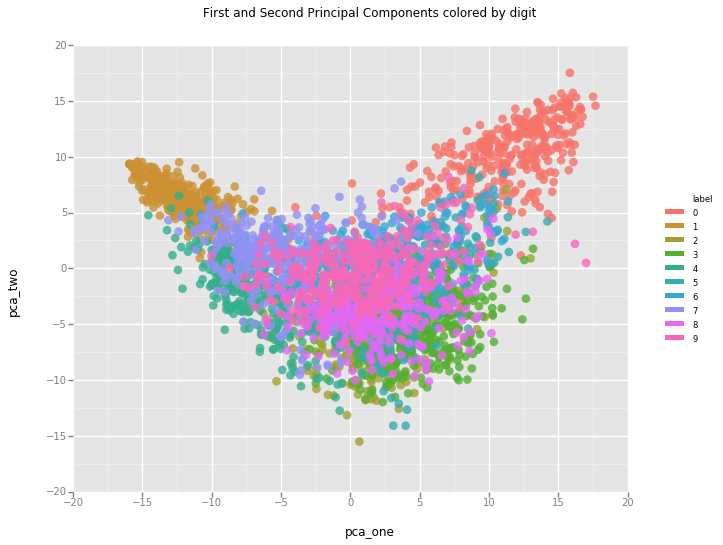

<ggplot: (8763494767985)>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from ggplot import *
# create the dataframe of pca_data : 'pca_one':the first component;'pca_two':the second component; 'label': labels
pca_data = {'pca_one': pca_one, 'pca_two': pca_two, 'label': y_test}
df = pd.DataFrame(data = pca_data)
df['label'] = df['label'].apply(lambda i: str(i))
rndperm = np.random.permutation(df.shape[0])

ggplot( df.loc[rndperm[:3500],:], aes(x='pca_one', y='pca_two', color='label') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")

## This feature map show that:
## 1. The whole features looks like a 'V' shape.
## 2. Each digit feature is confined in a certrain area.

In [22]:
k = 2
kmodel = PCA(n_components = k).fit(trainX)
pca_result = kmodel.transform(trainX)
pca_one = pca_result[:,0]
pca_two = pca_result[:,1]
print ('Explained variation per principal component: {}'.format(kmodel.explained_variance_ratio_))

Explained variation per principal component: [0.14689633 0.08666787]


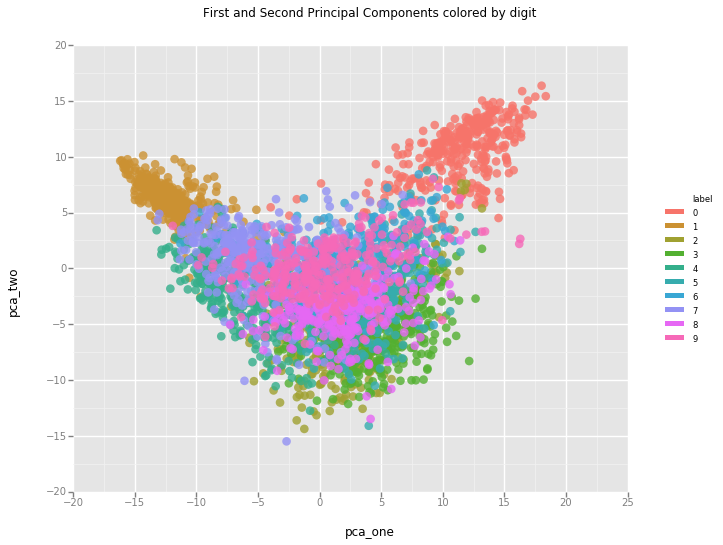

<ggplot: (8763494767981)>

In [23]:
# create the dataframe of pca_data : 'pca_one':the first component;'pca_two':the second component; 'label': labels
pca_data = {'pca_one': pca_one, 'pca_two': pca_two, 'label': y_test}
df = pd.DataFrame(data = pca_data)
df['label'] = df['label'].apply(lambda i: str(i))
rndperm = np.random.permutation(df.shape[0])

ggplot( df.loc[rndperm[:3500],:], aes(x='pca_one', y='pca_two', color='label') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")

In [25]:
FeaturesTr = featuresTr.reshape(featuresTr.shape[0], featuresTr.shape[3])
FeaturesTe = featuresTe.reshape(featuresTe.shape[0], featuresTe.shape[3])
print(featuresTr.shape)
print(FeaturesTr.shape)
print(FeaturesTe.shape)

(60000, 1, 1, 512)
(60000, 512)
(10000, 512)


## Use the extracted features to train a simple network

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [27]:
model1 = Sequential()
model1.add(Dense(1024, input_shape=(FeaturesTr.shape[1],), activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(10, activation='softmax'))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 535,562
Trainable params: 535,562
Non-trainable params: 0
_________________________________________________________________


In [28]:
import time
ts = time.time()
# Compile the model
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# Train the Model
history = model1.fit(FeaturesTr, Y_train, epochs=10, batch_size = 32, verbose=2)

t_elap = time.time() - ts

Epoch 1/10
 - 20s - loss: 0.0554 - acc: 0.9802
Epoch 2/10
 - 19s - loss: 0.0321 - acc: 0.9886
Epoch 3/10
 - 19s - loss: 0.0281 - acc: 0.9900
Epoch 4/10
 - 19s - loss: 0.0259 - acc: 0.9908
Epoch 5/10
 - 19s - loss: 0.0247 - acc: 0.9911
Epoch 6/10
 - 19s - loss: 0.0233 - acc: 0.9917
Epoch 7/10
 - 19s - loss: 0.0224 - acc: 0.9920
Epoch 8/10
 - 19s - loss: 0.0216 - acc: 0.9922
Epoch 9/10
 - 19s - loss: 0.0211 - acc: 0.9925
Epoch 10/10
 - 19s - loss: 0.0200 - acc: 0.9929


In [29]:
print(FeaturesTe.shape)
X_testp = FeaturesTe
m, n = X_testp.shape
s = 0
for i in range(m):
    a = model1.predict(X_testp[i,:].reshape(1,n))
    if np.argmax(a) == y_test[i]:
        s+=1
print('accuracy = '+ str(float(s)/m))

(10000, 512)
accuracy = 0.9766


In [30]:
X_train11 = X_train.reshape(X_train.shape[0], -1)
print(X_train11.shape)

(60000, 6912)


## Use the raw MNIST data to train a simple network

In [31]:
model2 = Sequential()
model2.add(Dense(1024, input_shape=(X_train11.shape[1],), activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1024)              7078912   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10250     
Total params: 7,089,162
Trainable params: 7,089,162
Non-trainable params: 0
_________________________________________________________________


In [32]:
import time
ts = time.time()
# Compile the model
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# Train the Model
history = model2.fit(X_train11, Y_train, epochs=3, batch_size = 32, verbose=2)

t_elap = time.time() - ts

Epoch 1/3
 - 193s - loss: 0.0426 - acc: 0.9854
Epoch 2/3
 - 194s - loss: 0.0230 - acc: 0.9921
Epoch 3/3
 - 193s - loss: 0.0183 - acc: 0.9939


In [33]:
print(t_elap)

580.506024122


In [34]:
X_test11 = X_test.reshape(X_test.shape[0], -1)
print(X_test11.shape)
X_testp = X_test11
m, n = X_testp.shape
s = 0
for i in range(m):
    a = model2.predict(X_testp[i,:].reshape(1,n))
    if np.argmax(a) == y_test[i]:
        s+=1
print('accuracy = '+ str(float(s)/m))

(10000, 6912)
accuracy = 0.9783


## From above we can find that:
## 1. Using the extracted feature can train the network faster (e.g. 20s/Epoch (w. feature) v.s. 193s/Epoch (w.o. features) ))because of the reduced input data size as well as the associated parameters
## 2. The accuracy of two networks trained with/without VGG16 extracted features is similar (e.g. 0.9766 (w. feature) v.s 0.9783 (w.o. features )). This probally due to that features extracted by pretrained network contain enough information for digit recognition. And this test also show that we can use pretrained network to extract feature before training process in order to speed up the whole procedure without great loss in accuracy.